In [19]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise
from lowEBMs.Packages.Variables import variable_importer, Vars
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Optimization import add_parameters


In [23]:
parameter_labels=[['func1','m']]
parameter_values=[[0.4,0.45,0.5,0.55,0.6]]
setup={'number_of_parameters': 5, 'number_of_cycles': 1, 'number_of_parallels': 5}


config_base=importer('EBM1D_parallel_Ensemble_config.ini')
variable_importer(config_base,initialZMT=True,parallel=True,parallel_config=setup)
config_addsellers,ParasCTRL=add_sellersparameters(config_base,\
                                    parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
config_addparameters=add_parameters(config_addsellers,parameter_values,parameter_labels)

eq=config_addparameters['eqparam']
rk=config_addparameters['rk4input']
fun=config_addparameters['funccomp']
Time,ZMT,GMT=rk4alg(model_equation,eq,rk4,fun)

Loading Configuration from: ../Config/EBM1D_parallel_Ensemble_config.ini
Loading Parameters from: ../Config/Data/SellersParameterization.ini


HBox(children=(IntProgress(value=0, max=36500), HTML(value='')))

In [10]:
from lowEBMs import update_plotstyle
import lowEBMs.Packages.Constants as const
import builtins
import matplotlib
update_plotstyle()
matplotlib.rcParams['lines.linewidth']=1.1

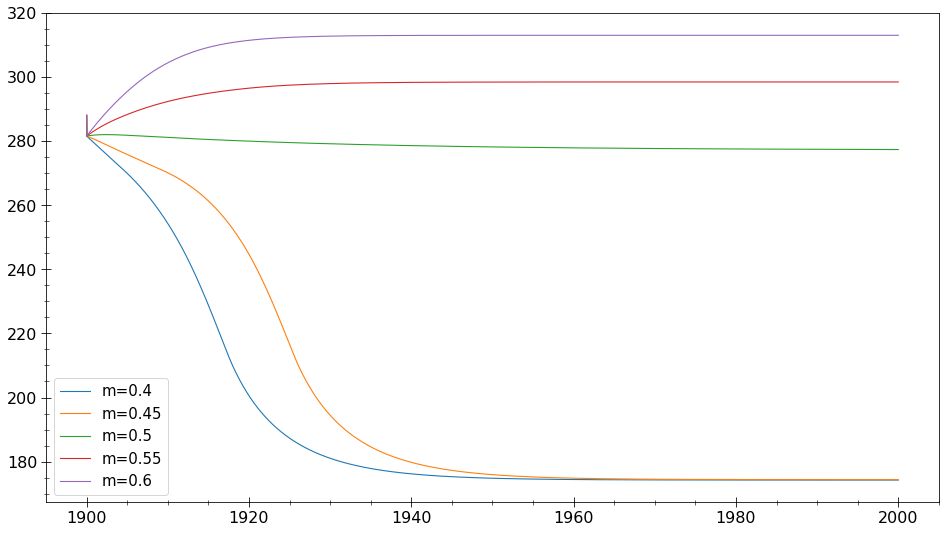

In [18]:
plt.figure(figsize=(16,9))
for k in range(5):
    plt.plot(Time/constants.time_sec_year,GMT[:,k],label='m='+str(parameter_values[0][k]))
plt.legend(fontsize=15)

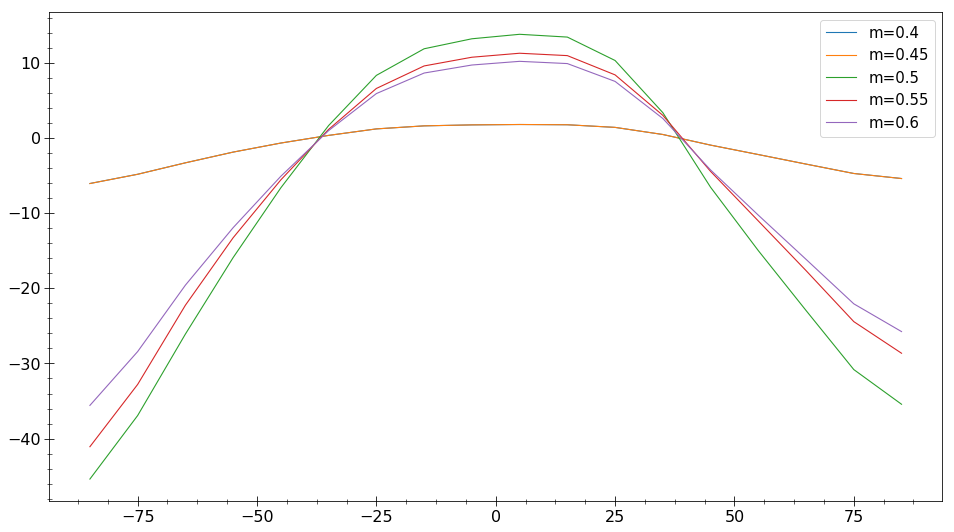

In [22]:
plt.figure(figsize=(16,9))
for k in range(5):
    plt.plot(Vars.Lat,ZMT[-1,k]-np.average(ZMT[-1,k],weights=np.cos(Vars.Lat*np.pi/180)),label='m='+str(parameter_values[0][k]))
plt.legend(fontsize=15)